## Exploratory data analysis
After the data cleaning step to put the data in the right format, it is time to explore the data to find any pattern and trend. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
from pyprojroot import here

In [2]:
# Read in the data in the previous step
df = pd.read_pickle('..\data\processed\data_clean.pkl')
df.head()

,project_title,project_description,area_primary,discipline_primary,approval_date,lead_research_institution,city,ontario_commitment,total_project_costs,keyword,year,month,label_total_project_costs,label_ontario_commitment,ontario_share,two_labela_ontario_commitment
0,density matrix renormalization group simulatio...,proposed infrastructure to consist of a comput...,763,12300.0,2005-10-24,university of windsor,windsor,50000,175708,density matrix renormalization group numerical...,2005,10,0,0,0.284563,0
1,adolescent depressive vulnerability through th...,the proposed infrastructure consisting of onsi...,4,15100.0,2005-07-22,university of toronto,toronto,59422,148557,depression adolescence cognitive vulnerability...,2005,7,0,0,0.399995,0
2,autonomic computing laboratory,autonomic computing laboratory will enable res...,25,11800.0,2005-10-24,university of toronto,toronto,292551,731377,scaling availability adaptive selfmanaging sel...,2005,10,2,3,0.400000,1
3,laboratory for forest genomics,the proposed facility will enable the examina...,63,14400.0,2005-07-22,university of toronto,toronto,200000,500000,comparative functional genomics molecular biol...,2005,7,2,2,0.400000,1
4,stoe ipds diffractometer stateoftheart image ...,researchers at mcmaster university intend to u...,76,13000.0,2006-12-21,mcmaster university,hamilton,100000,261369,magnetocaloric materials for magnetic refriger...,2006,12,1,0,0.382601,0


In [3]:
# sort the data base on date
df = df.sort_values(by="approval_date")
df

,project_title,project_description,area_primary,discipline_primary,approval_date,lead_research_institution,city,ontario_commitment,total_project_costs,keyword,year,month,label_total_project_costs,label_ontario_commitment,ontario_share,two_labela_ontario_commitment
312,biological microbeam for low dose radiobiology...,the proposed research is at the international ...,77,21300.0,2004-12-16,mcmaster university,hamilton,145990,1174624,microbeam singleion irradiatoraccelerator low ...,2004,12,3,1,0.124287,0
268,mobile laboratories for clinical behavioural a...,the project will establish a unique capability...,43,40800.0,2004-12-16,queens university,kingston,357063,2871206,autism spectrum disorders genetics subgrouping...,2004,12,3,3,0.124360,1
267,lifespan development research centre,this ambitious well designed innovative propos...,10,22100.0,2004-12-16,brock university,stcatharines,809160,6513952,behavioural and social sciences psychology neu...,2004,12,3,3,0.124220,1
179,sharcnet 2 expansion of existing grid,the shared hierarchical academic research comp...,7,5000.0,2004-12-16,the university of western ontario,london,4297250,35606145,high performance computing computational physi...,2004,12,3,3,0.120688,1
180,sharcnet 2 new partners and networking,the project will establish resources for new p...,7,99998.0,2004-12-16,the university of western ontario,london,1711439,13809576,NaN,2004,12,3,3,0.123931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,the development and application of genomic too...,this research program will harness genomic tec...,3,5000.0,2021-12-17,university of ottawa,ottawa,320000,862516,na,2021,12,3,3,0.371008,1
3091,holistic analysis of plastic additives as envi...,dr roxanna suehring will build an analytical p...,34,12900.0,2021-12-17,ryerson university,toronto,75990,200481,na,2021,12,0,0,0.379038,0
3132,lambton water centre,through this orf request lambton college will ...,NaN,NaN,2022-03-01,lambton college,sarnia,597715,1494288,water wastewater water chemisty culturing pilo...,2022,3,3,3,0.400000,1
3131,niagara college nextgen greenhouse excellence,niagara college looks to expand upon strategic...,NaN,NaN,2022-03-01,niagara college,niaraga on the lake,892391,7422302,greenhouse technology cannabis biocontrols gro...,2022,3,3,3,0.120231,1


# Graphs

C:\Users\Atieh\AppData\Local\Temp\ipykernel_2764\835314161.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['year'])['ontario_commitment','total_project_costs'].sum().plot()


<AxesSubplot:xlabel='year'>

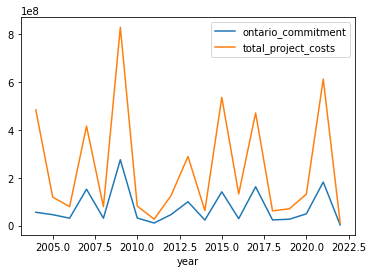

In [4]:
df.groupby(['year'])['ontario_commitment','total_project_costs'].sum().plot()


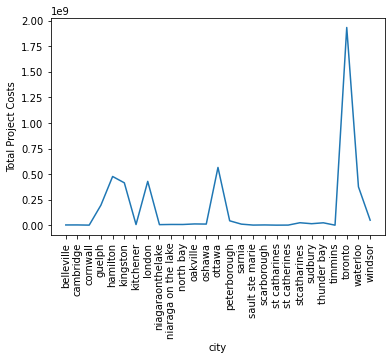

In [5]:
fig,ax=plt.subplots()
df.groupby(['city'])['total_project_costs'].sum().plot()
ax.set_xticks(np.arange(len(df.groupby(['city'])['total_project_costs'].sum().index)))
ax.set_xticklabels(df.groupby(['city'])['total_project_costs'].sum().index,rotation=90)
ax.set_ylabel("Total Project Costs")
plt.show()

In [6]:
len(df.groupby(['city'])['total_project_costs'].sum().index)

27

In [7]:
df['city'].unique()

array(['hamilton', 'kingston', 'stcatharines', 'london', 'toronto',
       'thunder bay', 'peterborough', 'windsor', 'ottawa', 'guelph',
       'waterloo', 'sault ste marie', 'sudbury', 'oshawa', 'north bay',
       'niagaraonthelake', 'cornwall', 'oakville', 'kitchener', 'sarnia',
       'scarborough', 'timmins', 'belleville', 'cambridge',
       'st catharines', 'st catherines', nan, 'niaraga on the lake'],
      dtype=object)

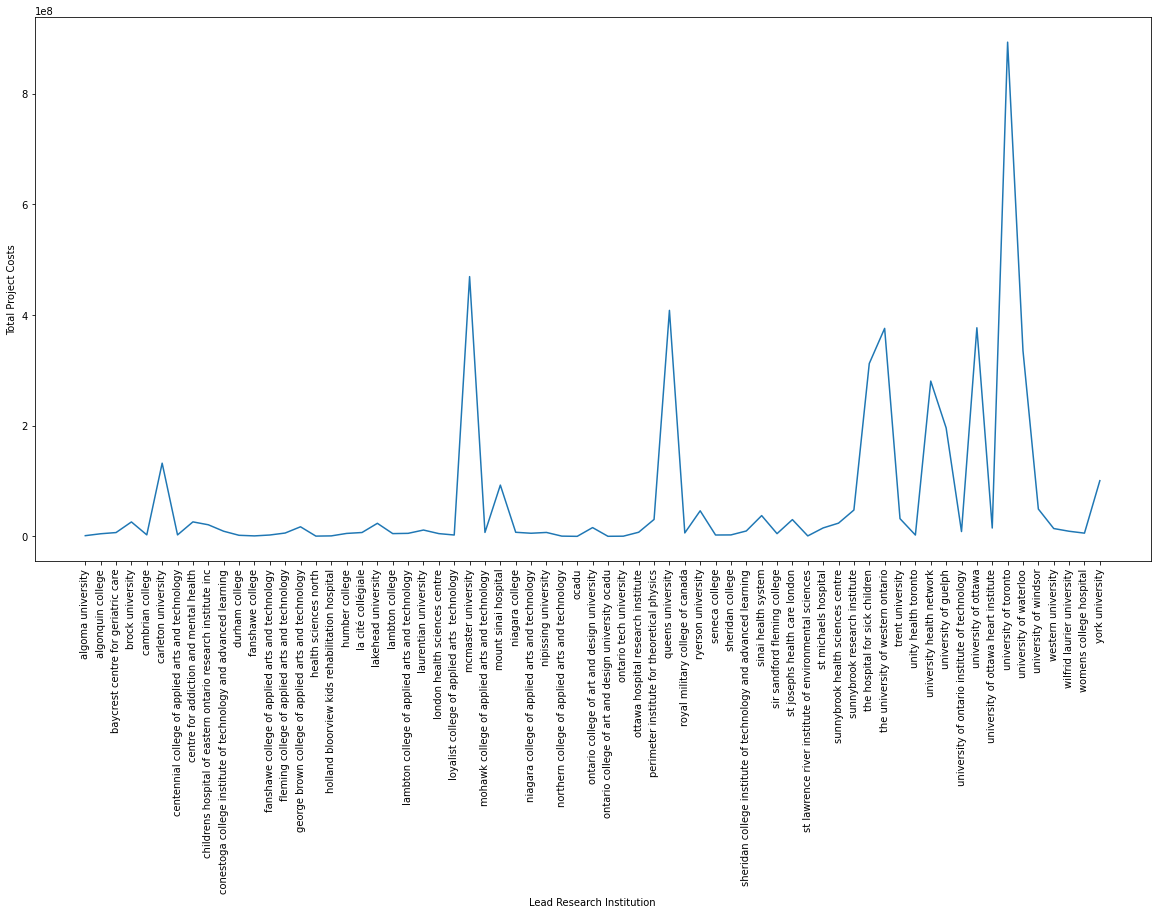

In [8]:
fig,ax=plt.subplots(figsize=(20,10))

df.groupby(['lead_research_institution'])['total_project_costs'].sum().plot()
#plt.tick_params(which='minor', labelsize=__)
ax.set_xticks(np.arange(len(df.groupby(['lead_research_institution'])['total_project_costs'].sum().index)))
ax.set_xticklabels(df.groupby(['lead_research_institution'])['total_project_costs'].sum().index,rotation=90)

#ax.set_xticklabels(df.lead_research_institution,rotation=90)
ax.set_ylabel("Total Project Costs")
ax.set_xlabel("Lead Research Institution")
plt.show()

In [9]:
np.arange(len(df.groupby(['lead_research_institution'])['total_project_costs'].sum().index))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [10]:
df.groupby(['lead_research_institution'])['total_project_costs'].count().tail(30)

lead_research_institution
perimeter institute for theoretical physics                         1
queens university                                                 250
royal military college of canada                                    8
ryerson university                                                 65
seneca college                                                      1
sheridan college                                                    1
sheridan college institute of technology and advanced learning      3
sinai health system                                                 9
sir sandford fleming college                                        2
st josephs health care london                                       2
st lawrence river institute of environmental sciences               1
st michaels hospital                                               14
sunnybrook health sciences centre                                   2
sunnybrook research institute                                   

<AxesSubplot:xlabel='area_primary'>

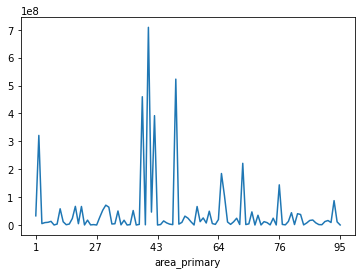

In [11]:
df.groupby(['area_primary'])['total_project_costs'].sum().plot()

In [12]:
df.groupby(['area_primary'])['total_project_costs'].count()

area_primary
1      16
10    166
11      9
12      3
13     10
     ... 
88     36
9       3
91     29
92      6
95      1
Name: total_project_costs, Length: 101, dtype: int64

<AxesSubplot:xlabel='discipline_primary'>

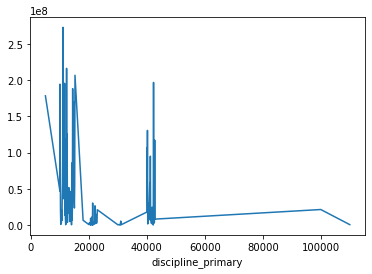

In [13]:
df.groupby(['discipline_primary'])['total_project_costs'].sum().plot()

In [14]:
df.groupby(['discipline_primary'])['total_project_costs'].count()

discipline_primary
5000.0      28
10000.0     16
10001.0     26
10100.0     59
10200.0     15
            ..
42600.0      8
42700.0     26
42800.0     13
99998.0      7
110000.0     1
Name: total_project_costs, Length: 123, dtype: int64

In [15]:
df.groupby(['discipline_primary'])['total_project_costs'].sum()


discipline_primary
5000.0      178267934
10000.0      46811163
10001.0     194286999
10100.0      97288953
10200.0      20487662
              ...    
42600.0       3597723
42700.0     117169557
42800.0       8181836
99998.0      21408865
110000.0       544070
Name: total_project_costs, Length: 123, dtype: int32

<AxesSubplot:>

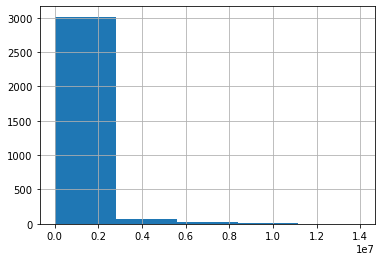

In [16]:
df.ontario_commitment.hist(bins=5)

In [17]:
df.ontario_commitment.mean(),df.ontario_commitment.median()

(450980.40331844287, 150000.0)

In [18]:
df.loc[(df['total_project_costs']>=10000000) & (df['total_project_costs']<20000000)].count()

project_title                    72
project_description              72
area_primary                     72
discipline_primary               72
approval_date                    72
lead_research_institution        72
city                             72
ontario_commitment               72
total_project_costs              72
keyword                          46
year                             72
month                            72
label_total_project_costs        72
label_ontario_commitment         72
ontario_share                    72
two_labela_ontario_commitment    72
dtype: int64

In [19]:
df['total_project_costs']

312      1174624
268      2871206
267      6513952
179     35606145
180     13809576
          ...   
3102      862516
3091      200481
3132     1494288
3131     7422302
3133     2765734
Name: total_project_costs, Length: 3134, dtype: int32

In [21]:
x = np.quantile(df['ontario_commitment'], [0,0.25,0.5,0.75,1])
x

array([4.7400000e+03, 1.0000000e+05, 1.5000000e+05, 2.6999300e+05,
       1.3961537e+07])

In [26]:
df.loc[(df['total_project_costs']<=4.7400000e+03)].count() # these are outliers lower than 0 quantile

project_title                    0
project_description              0
area_primary                     0
discipline_primary               0
approval_date                    0
lead_research_institution        0
city                             0
ontario_commitment               0
total_project_costs              0
keyword                          0
year                             0
month                            0
label_total_project_costs        0
label_ontario_commitment         0
ontario_share                    0
two_labela_ontario_commitment    0
dtype: int64

In [27]:
df.loc[(df['total_project_costs']>=1.3961537e+07)].count() # these are outliers higher than 1 quantile

project_title                    75
project_description              75
area_primary                     75
discipline_primary               75
approval_date                    75
lead_research_institution        75
city                             75
ontario_commitment               75
total_project_costs              75
keyword                          47
year                             75
month                            75
label_total_project_costs        75
label_ontario_commitment         75
ontario_share                    75
two_labela_ontario_commitment    75
dtype: int64

<AxesSubplot:>

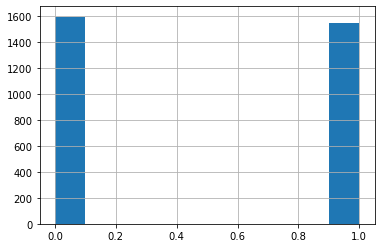

In [22]:
df['two_labela_ontario_commitment'].hist()